In [92]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [93]:
dane=pd.read_csv('Portuguese.csv')
dane.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [94]:
dane.isnull().values.any()

False

In [98]:
dane['good_student']=2

for i in range(len(dane['G3'])):
    if dane['G3'][i] >= 13:
        dane['good_student'][i]=1
    else:
        dane['good_student'][i]=0

dane.head(20)

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\580593654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane['good_student'][i]=0
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\580593654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane['good_student'][i]=0
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\580593654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane['good_student'][i]=0
C:\Users\Anas

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,good_student
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,6,12,12,13,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,13,12,13,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,2,10,13,13,1
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,15,16,17,1
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,12,12,13,1


In [99]:
y = dane.good_student

#creating list of variables based on our tests in R
features = ['failures', 'higher', 'school', 'schoolsup', 'sex', 'studytime', 'reason', 'Medu', 'Walc', 'age', 'freetime', 'goout']

# Select columns corresponding to features, and preview the data
X = dane[features]
print(X.head())
print(X.describe())

   failures higher school schoolsup sex  studytime  reason  Medu  Walc  age  \
0         0    yes     GP       yes   F          2  course     4     1   18   
1         0    yes     GP        no   F          2  course     1     1   17   
2         0    yes     GP       yes   F          2   other     1     3   15   
3         0    yes     GP        no   F          3    home     4     1   15   
4         0    yes     GP        no   F          2    home     3     2   16   

   freetime  goout  
0         3      4  
1         3      3  
2         3      2  
3         2      2  
4         3      2  
         failures   studytime        Medu        Walc         age    freetime  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     0.221880    1.930663    2.514638    2.280431   16.744222    3.180277   
std      0.593235    0.829510    1.134552    1.284380    1.218138    1.051093   
min      0.000000    1.000000    0.000000    1.000000   15.000000    1.0000

In [100]:
for i in range(len(X['school'])):
    if X['school'][i]=='GP':
        X['school'][i]=1
    else:
        X['school'][i]=0

X['school'] = pd.Categorical(X.school)
X.head(20)

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\2956703590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['school'][i]=1
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\2956703590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['school'][i]=1
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\2956703590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['school'][i]=1
C:\Users\Anastasia\AppData\Local\Temp

,failures,higher,school,schoolsup,sex,studytime,reason,Medu,Walc,age,freetime,goout
0,0,yes,1,yes,F,2,course,4,1,18,3,4
1,0,yes,1,no,F,2,course,1,1,17,3,3
2,0,yes,1,yes,F,2,other,1,3,15,3,2
3,0,yes,1,no,F,3,home,4,1,15,2,2
4,0,yes,1,no,F,2,home,3,2,16,3,2
5,0,yes,1,no,M,2,reputation,4,2,16,4,2
6,0,yes,1,no,M,2,home,2,1,16,4,4
7,0,yes,1,yes,F,2,home,4,1,17,1,4
8,0,yes,1,no,M,2,home,3,1,15,2,2
9,0,yes,1,no,M,2,home,3,1,15,5,1


In [101]:
for i in range(len(X['sex'])):
    if X['sex'][i]=='M':
        X['sex'][i]=1
    else:
        X['sex'][i]=0

X['sex'] = pd.Categorical(X.sex)
X.head(20)

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\221952822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'][i]=0
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\221952822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'][i]=1
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\221952822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex

,failures,higher,school,schoolsup,sex,studytime,reason,Medu,Walc,age,freetime,goout
0,0,yes,1,yes,0,2,course,4,1,18,3,4
1,0,yes,1,no,0,2,course,1,1,17,3,3
2,0,yes,1,yes,0,2,other,1,3,15,3,2
3,0,yes,1,no,0,3,home,4,1,15,2,2
4,0,yes,1,no,0,2,home,3,2,16,3,2
5,0,yes,1,no,1,2,reputation,4,2,16,4,2
6,0,yes,1,no,1,2,home,2,1,16,4,4
7,0,yes,1,yes,0,2,home,4,1,17,1,4
8,0,yes,1,no,1,2,home,3,1,15,2,2
9,0,yes,1,no,1,2,home,3,1,15,5,1


In [102]:
for i in range(len(X['reason'])):
    if X['reason'][i]=='home':
        X['reason'][i]=1
    elif X['reason'][i]=='reputation':
        X['reason'][i]=2
    elif X['reason'][i]=='course':
        X['reason'][i]=3
    else:
        X['reason'][i]=4

X['reason'] = pd.Categorical(X.reason)
X.head(20)

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\1602995252.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['reason'][i]=3
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\1602995252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['reason'][i]=4
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\1602995252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['reason'][i]=1
C:\Users\Anastasia\AppData\Local\Temp

,failures,higher,school,schoolsup,sex,studytime,reason,Medu,Walc,age,freetime,goout
0,0,yes,1,yes,0,2,3,4,1,18,3,4
1,0,yes,1,no,0,2,3,1,1,17,3,3
2,0,yes,1,yes,0,2,4,1,3,15,3,2
3,0,yes,1,no,0,3,1,4,1,15,2,2
4,0,yes,1,no,0,2,1,3,2,16,3,2
5,0,yes,1,no,1,2,2,4,2,16,4,2
6,0,yes,1,no,1,2,1,2,1,16,4,4
7,0,yes,1,yes,0,2,1,4,1,17,1,4
8,0,yes,1,no,1,2,1,3,1,15,2,2
9,0,yes,1,no,1,2,1,3,1,15,5,1


In [103]:
categories = ['higher', 'schoolsup']
for cat in range(len(categories)):
    for i in range(len(X[categories[cat]])):
        if X[categories[cat]][i]=='yes':
            X[categories[cat]][i]=1
        else:
            X[categories[cat]][i]=0

X['higher'] = pd.Categorical(X.higher)
X['schoolsup'] = pd.Categorical(X.schoolsup)
X.head(20)

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\1979038955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categories[cat]][i]=1
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\1979038955.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categories[cat]][i]=0
C:\Users\Anastasia\AppData\Local\Temp\ipykernel_11660\1979038955.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,failures,higher,school,schoolsup,sex,studytime,reason,Medu,Walc,age,freetime,goout
0,0,1,1,1,0,2,3,4,1,18,3,4
1,0,1,1,0,0,2,3,1,1,17,3,3
2,0,1,1,1,0,2,4,1,3,15,3,2
3,0,1,1,0,0,3,1,4,1,15,2,2
4,0,1,1,0,0,2,1,3,2,16,3,2
5,0,1,1,0,1,2,2,4,2,16,4,2
6,0,1,1,0,1,2,1,2,1,16,4,4
7,0,1,1,1,0,2,1,4,1,17,1,4
8,0,1,1,0,1,2,1,3,1,15,2,2
9,0,1,1,0,1,2,1,3,1,15,5,1


In [104]:
# Split into training and testing data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=123)

In [105]:
#specify the model
model_alc = DecisionTreeClassifier(random_state=123)

#fit the model
model_alc.fit(train_X,train_y)
model_alc_predictions = model_alc.predict(test_X)
model_alc_mae = mean_absolute_error(model_alc_predictions, test_y)

print(model_alc.predict(test_X.head(10)))
# print the top few actual prices from validation data
print(y.head(10))

print("Validation MAE for Decision Tree Model: {:,.0f}".format(model_alc_mae))

[1 1 0 0 0 1 0 0 1 1]
0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: good_student, dtype: int64
Validation MAE for Decision Tree Model: 0


In [106]:
#checking which parametres are better
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=123)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    mae = mean_absolute_error(test_y, preds_val)
    return(mae)

In [107]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = {leaf_size: get_mae(leaf_size, train_X, test_X, train_y, test_y) for leaf_size in candidate_max_leaf_nodes}
        
best_tree_size = min(scores, key=scores.get)
print(best_tree_size)

25


In [108]:
#specify the model
model_alc_corrected = DecisionTreeClassifier(max_leaf_nodes=25, random_state=123)

# Split into training and testing data
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=123)

#fit the model
model_alc_corrected.fit(train_X,train_y)
model_alc_corrected_predictions = model_alc_corrected.predict(test_X)
model_alc_corrected_mae = mean_absolute_error(model_alc_corrected_predictions, test_y)

print(model_alc_corrected.predict(test_X.head(10)))
# print the top few actual prices from validation data
print(y.head(10))

print("Validation MAE for Decision Tree Model: {:,.0f}".format(model_alc_corrected_mae))

[1 0 0 0 0 1 1 0 1 1]
0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: good_student, dtype: int64
Validation MAE for Decision Tree Model: 0


In [109]:
# Define a random forest model
model_alc_forest = RandomForestClassifier(random_state=123)
model_alc_forest.fit(train_X, train_y)
model_alc_forest_predictions = model_alc_forest.predict(test_X)
model_alc_forest_mae = mean_absolute_error(model_alc_forest_predictions, test_y)

print(model_alc_forest.predict(test_X.head(10)))
# print the top few actual prices from validation data
print(y.head(10))

print("Validation MAE for Random Forest Model: {:,.0f}".format(model_alc_forest_mae))

[1 0 0 0 0 1 1 0 1 1]
0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: good_student, dtype: int64
Validation MAE for Random Forest Model: 0


In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

y_score1 = model_alc_corrected.predict_proba(test_X)[:,1]
y_score2 = model_alc_forest.predict_proba(test_X)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(test_y, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(test_y, y_score2)

print('roc_auc_score for DecisionTree: ', roc_auc_score(test_y, y_score1))
print('roc_auc_score for RandomForest: ', roc_auc_score(test_y, y_score2))

roc_auc_score for DecisionTree:  0.7042921686746988
roc_auc_score for RandomForest:  0.7754518072289156


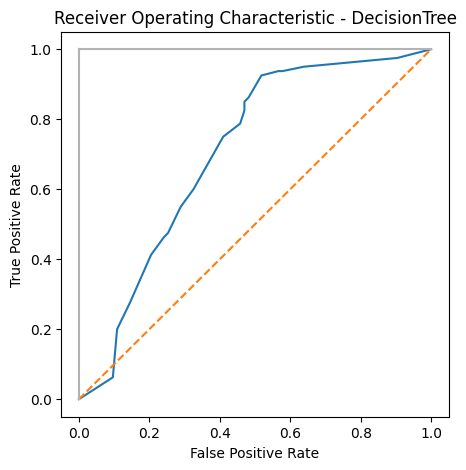

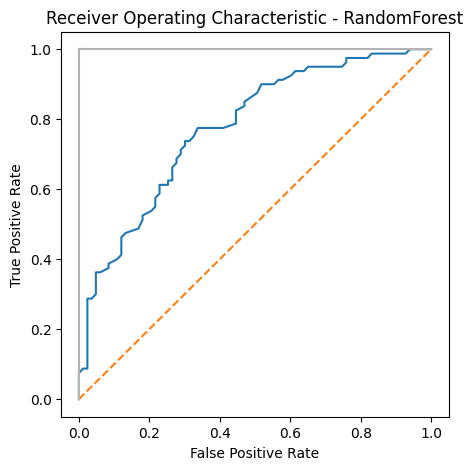

In [114]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

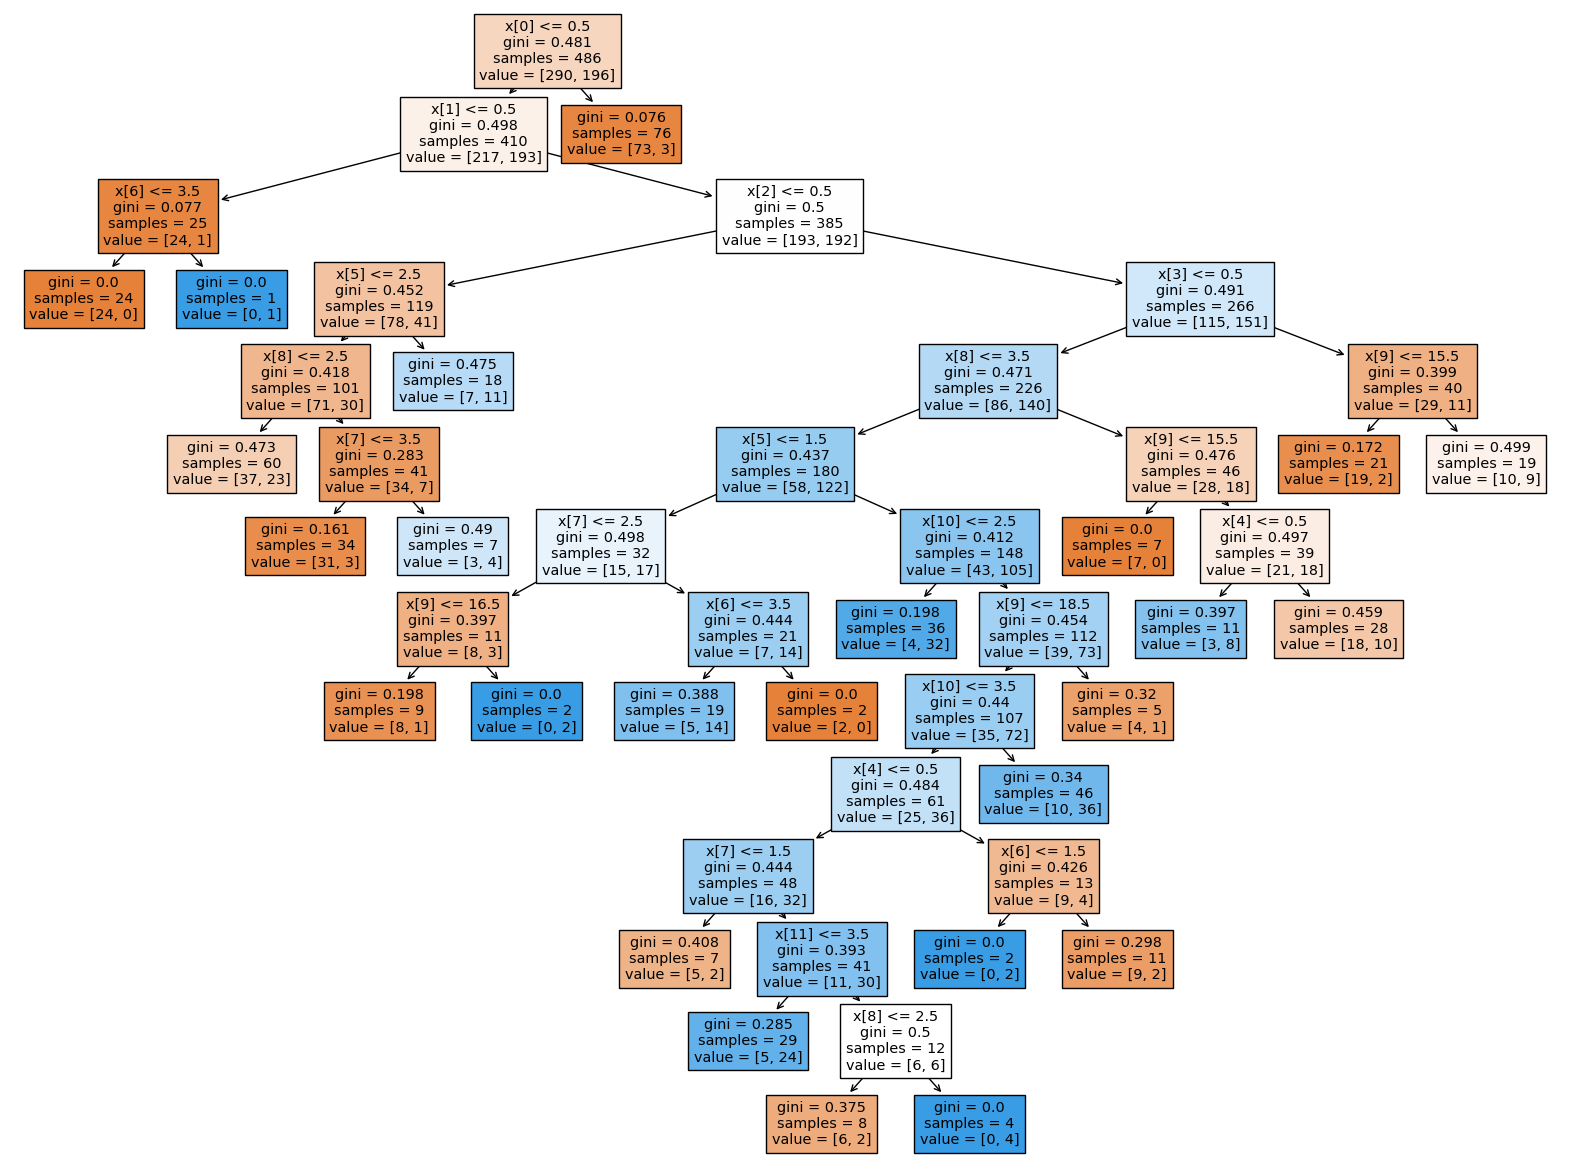

In [118]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(model_alc_corrected, filled=True)